# Nama : Naufal Hanif Saputra
# NIM : 4111422060
# UTS Data Mining

# Data Understanding

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Muat file data_training.csv
# Pastikan Anda telah mengunggah file "data_training.csv" ke sesi Colab
df_train = pd.read_csv('/content/data_training.csv')

# Tampilkan 5 baris pertama data untuk verifikasi
print("5 Baris Pertama Data Training:")
print(df_train.head())

# Tampilkan informasi umum data
print("\nInformasi Data Training:")
print(df_train.info())

5 Baris Pertama Data Training:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.3             0.740         0.08             1.7      0.094   
1            8.1             0.575         0.22             2.1      0.077   
2           10.1             0.430         0.40             2.6      0.092   
3           12.9             0.500         0.55             2.8      0.072   
4            8.4             0.360         0.32             2.2      0.081   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 10.0                  45.0  0.99576  3.24       0.50   
1                 12.0                  65.0  0.99670  3.29       0.51   
2                 13.0                  52.0  0.99834  3.22       0.64   
3                  7.0                  24.0  1.00012  3.09       0.68   
4                 32.0                  79.0  0.99640  3.30       0.72   

   alcohol  quality    Id  
0      9.8        5  1366  

Data tersebut merupakan data training. Berikut adalah variabel-variabel yang terdapat dalam dataset.

1   fixed acidity = Keasaman Tetap

2   volatile acidity = Keasaman Volatil

3   citric acid = Asam Sitrat

4   residual sugar = Gula Residu

5   chlorides = Klorida

6   free sulfur dioxide = Sulfur Dioksida Bebas

7   total sulfur dioxide = Sulfur Dioksida Total

8   density = Densitas

9   pH = pH

10   sulphates = Sulfat

11  alcohol = Alkohol

12  quality = Kualitas

13  Id = Id

Dataset training terdiri dari 857 baris dan 13 kolom.

In [ ]:
# Hitung jumlah nilai yang hilang (missing values) per kolom
print("Jumlah Missing Values per Kolom:")
print(df_train.isnull().sum())

# Cek persentase missing values total
total_missing = df_train.isnull().sum().sum()
if total_missing > 0:
    print(f"\nTotal nilai yang hilang: {total_missing}")
else:
    print("\n✅ Tidak ada Missing Values (nilai NaN) dalam dataset ini.")

# Catatan: Jika ada nilai yang hilang (bukan NaN, misalnya '?' atau ' '),
# Anda perlu menggantinya dengan NaN terlebih dahulu sebelum menggunakan isnull().
# Jika ada, Anda bisa melakukan Imputasi (misalnya dengan Median)
# Contoh Imputasi Median:
# for col in df_train.columns:
#     if df_train[col].isnull().sum() > 0:
#         df_train[col].fillna(df_train[col].median(), inplace=True)
# print("\nMissing values telah ditangani dengan Imputasi Median.")

Jumlah Missing Values per Kolom:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

✅ Tidak ada Missing Values (nilai NaN) dalam dataset ini.


Dari hasil diatas, dilihat bahwa semua missing value telah terisi atau tidak ada Missing Values (nilai NaN) dalam dataset ini.

In [ ]:
# 1. Pisahkan Fitur dan Target
# Kolom 'quality' adalah variabel target (y)
# Kolom 'Id' dikecualikan dari fitur
X = df_train.drop(columns=['quality', 'Id'])
y = df_train['quality']

# Tampilkan skala nilai sebelum scaling
print("Statistik Fitur Sebelum Scaling:")
print(X.describe().loc[['min', 'max']])

# 2. Inisialisasi dan Terapkan StandardScaler
# StandardScaler akan membuat mean=0 dan std=1
scaler = StandardScaler()

# Lakukan proses fit dan transform pada data fitur (X)
X_scaled = scaler.fit_transform(X)

# 3. Konversi kembali ke DataFrame untuk analisis
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Tampilkan statistik setelah scaling untuk verifikasi
print("\nStatistik Fitur Setelah Scaling (StandardScaler):")
print(X_scaled_df.describe().loc[['mean', 'std', 'min', 'max']])

# Data X_scaled_df kini siap digunakan untuk pelatihan model (misalnya KNN, SVM, atau Neural Networks)

Statistik Fitur Sebelum Scaling:
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
min            4.6              0.12          0.0             0.9      0.012   
max           15.6              1.58          1.0            15.5      0.611   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
min                  1.0                   6.0  0.99007  2.74       0.39   
max                 68.0                 278.0  1.00320  4.01       2.00   

     alcohol  
min      8.4  
max     14.0  

Statistik Fitur Setelah Scaling (StandardScaler):
      fixed acidity  volatile acidity   citric acid  residual sugar  \
mean   2.922594e-16     -2.280038e-16  1.057109e-16   -8.291047e-17   
std    1.000584e+00      1.000584e+00  1.000584e+00    1.000584e+00   
min   -2.152830e+00     -2.286383e+00 -1.370820e+00   -1.242448e+00   
max    4.313960e+00      5.867437e+00  3.756593e+00    1.005124e+01   

         chlorides  free sulfur dioxide  tota

Bagian ini menampilkan nilai asli dari fitur-fitur tersebut.

1. min (minimum): Nilai terkecil yang ada dalam setiap fitur. Contoh: fixed acidity memiliki nilai minimum 4.6.

2. max (maksimum): Nilai terbesar yang ada dalam setiap fitur. Contoh: fixed acidity memiliki nilai maksimum 15.6.

Jadi, terlihat jelas adanya perbedaan skala yang besar antar fitur. Contoh: chlorides (min 0.012, max 0.611) berada di skala yang jauh lebih kecil dibandingkan total sulfur dioxide (min 6.0, max 278.0) dan Rentang nilai (max - min) juga sangat bervariasi. Perbedaan skala ini bisa menjadi masalah bagi beberapa algoritma Machine Learning yang sensitif terhadap skala fitur (misalnya, K-Nearest Neighbors, Support Vector Machines, atau teknik berbasis gradien).

mean (rata-rata): Nilai rata-rata untuk setiap fitur. Setelah scaling, nilainya sangat mendekati nol (ditunjukkan oleh notasi ilmiah seperti $2.922594\text{e-}16$ atau $-2.280038\text{e-}16$). Nilai-nilai yang sangat kecil ini mengonfirmasi bahwa rata-ratanya telah disetel ke nol.

std (standar deviasi): Nilai standar deviasi. Setelah scaling, nilainya tepat 1.000584e+00 (atau mendekati 1), yang mengonfirmasi bahwa variabilitas fitur telah dinormalisasi menjadi satu unit standar deviasi.

min (minimum) & max (maksimum): Nilai minimum dan maksimum setelah scaling menunjukkan seberapa jauh nilai ekstrem berada dari rata-rata (nol) dalam satuan standar deviasi. Contoh: Nilai minimum fixed acidity adalah -2.152830e+00 (sekitar 2.15 standar deviasi di bawah rata-rata).

Memulai pelatihan model Random Forest...
✅ Pelatihan model selesai.

===== EVALUASI PADA DATA PELATIHAN (TRAINING DATA) =====
Akurasi pada Data Pelatihan: 1.0000

Laporan Klasifikasi (Classification Report):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00       289
           6       1.00      1.00      1.00       273
           7       1.00      1.00      1.00        87
           8       1.00      1.00      1.00        10

    accuracy                           1.00       685
   macro avg       1.00      1.00      1.00       685
weighted avg       1.00      1.00      1.00       685



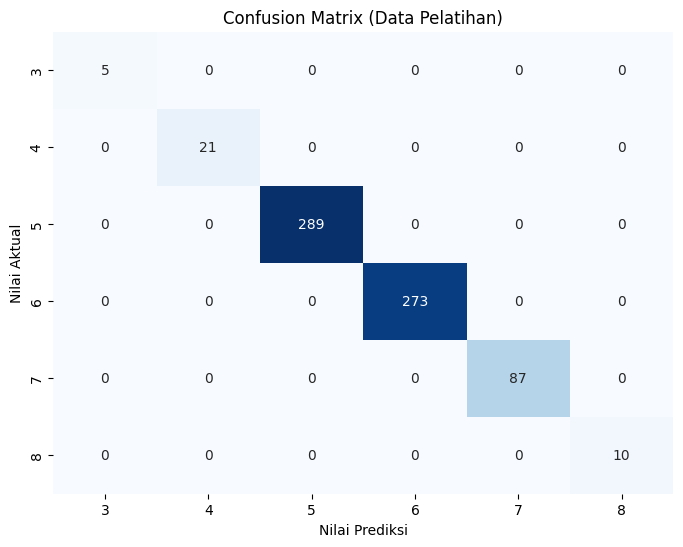


===== EVALUASI PADA DATA UJI (TESTING DATA) - Simulasi =====
Akurasi pada Data Uji (Testing): 0.6279


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Bagi Data (Train dan Test Split)
# Walaupun permintaan hanya untuk evaluasi pada data pelatihan,
# praktik terbaik adalah membagi data untuk simulasi evaluasi.
# Kita akan menggunakan 80% untuk pelatihan dan 20% untuk pengujian (simulasi)
# Catatan: Gunakan X_scaled_df (data yang sudah di-scale)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Penting untuk klasifikasi agar proporsi kelas tetap seimbang
)

# 2. Inisialisasi dan Latih Model Random Forest
print("Memulai pelatihan model Random Forest...")
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("✅ Pelatihan model selesai.")

# 3. Lakukan Prediksi pada Data Pelatihan (Sesuai Permintaan)
y_train_pred = model.predict(X_train)

# 4. Evaluasi Model pada Data Pelatihan
print("\n===== EVALUASI PADA DATA PELATIHAN (TRAINING DATA) =====")

# A. Akurasi
accuracy = accuracy_score(y_train, y_train_pred)
print(f"Akurasi pada Data Pelatihan: {accuracy:.4f}") # Akurasi biasanya sangat tinggi pada data latih untuk Random Forest

# B. Laporan Klasifikasi (Precision, Recall, F1-Score)
print("\nLaporan Klasifikasi (Classification Report):")
print(classification_report(y_train, y_train_pred, zero_division=0))

# C. Confusion Matrix
conf_matrix = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=False,
    yticklabels=np.sort(y.unique()),
    xticklabels=np.sort(y.unique())
)
plt.xlabel('Nilai Prediksi')
plt.ylabel('Nilai Aktual')
plt.title('Confusion Matrix (Data Pelatihan)')
plt.show()

# 5. Lakukan Prediksi pada Data Uji (Tambahan untuk Cross-Validation yang Lebih Baik)
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\n===== EVALUASI PADA DATA UJI (TESTING DATA) - Simulasi =====")
print(f"Akurasi pada Data Uji (Testing): {test_accuracy:.4f}")

Akurasi pada Data Pelatihan adalah 1.0000. Ini menunjukkan bahwa model mencapai akurasi sempurna (100%) pada data pelatihan. Meskipun terlihat bagus, akurasi 1.00 pada data pelatihan seringkali menjadi indikasi kuat terjadinya overfitting (model terlalu menghafal data pelatihan dan mungkin tidak akan bekerja baik pada data baru/uji).

Laporan ini memberikan metrik evaluasi rinci (precision, recall, f1-score, support) untuk setiap kelas (kelas 3 hingga 8).

1. 1.00 untuk semua metrik: Sama seperti akurasi, nilai 1.00 pada precision, recall, dan f1-score untuk semua kelas dan rata-rata menegaskan bahwa model berhasil mengklasifikasikan semua sampel data pelatihan dengan benar.

2. Support (Dukungan): Jumlah sampel aktual untuk setiap kelas dalam data pelatihan (total 685 sampel).

Matriks ini memvisualisasikan hasil klasifikasi. Baris menunjukkan Nilai Aktual (kelas sebenarnya) dan kolom menunjukkan Nilai Prediksi (kelas yang diprediksi model).

1 Angka-angka pada diagonal utama (dari kiri atas ke kanan bawah) adalah jumlah sampel yang diprediksi dengan benar. Contoh : Model memprediksi 289 sampel kelas 5 dengan benar sebagai kelas 5.

2 Angka selain diagonal utama adalah jumlah sampel yang salah diklasifikasikan.

1. Tidak ada angka selain diagonal utama dalam matriks ini (semuanya nol), yang berarti tidak ada satu pun kesalahan klasifikasi pada data pelatihan.

2. Ini konsisten dengan akurasi 1.00 dan laporan klasifikasi di atas, dan sekali lagi sangat menunjukkan overfitting.

Bagian paling bawah menunjukkan evaluasi model yang sama ketika diujikan pada data yang belum pernah dilihat sebelumnya (Data Uji/Simulasi 1).

Akurasi pada Data Uji (Testing): $\text{0.6279}$

1. Akurasi turun drastis dari 1.0000 (Data Pelatihan) menjadi 0.6279 (sekitar 62.79%) pada data uji.

2. Penurunan signifikan akurasi ini adalah bukti nyata terjadinya overfitting. Model bekerja sangat baik pada data pelatihan tetapi kinerjanya jauh lebih buruk pada data baru.

In [ ]:
# Pastikan pustaka pandas sudah diimpor: import pandas as pd

# 1. Muat Dataset Pengujian
# Perhatikan bahwa data testing tidak memiliki kolom 'quality'
df_test = pd.read_csv('/content/data_testing.csv')
print("5 Baris Pertama Data Testing:")
print(df_test.head())

# 2. Persiapan Fitur Data Pengujian
# Pisahkan kolom 'Id' (yang akan digunakan untuk submission)
test_ids = df_test['Id']
X_test_data = df_test.drop(columns=['Id'])

# 3. Terapkan Scaling (Standardisasi)
# PENTING: Gunakan scaler.transform() (BUKAN fit_transform())
# karena kita menggunakan scaler yang sudah dipelajari dari data training.
print("\nMenerapkan Standardisasi pada Data Testing...")
X_test_scaled = scaler.transform(X_test_data)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_data.columns)

# 4. Lakukan Prediksi
# Gunakan model Random Forest yang sudah dilatih
print("Melakukan prediksi dengan model Random Forest...")
test_predictions = model.predict(X_test_scaled_df)
print("✅ Prediksi selesai.")

# Tampilkan beberapa hasil prediksi
print("\nContoh Hasil Prediksi Quality:")
print(test_predictions[:10])

5 Baris Pertama Data Testing:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            6.8              0.61         0.04             1.5      0.057   
1            6.9              0.84         0.21             4.1      0.074   
2            7.0              0.58         0.12             1.9      0.091   
3            7.8              0.48         0.68             1.7      0.415   
4           12.5              0.60         0.49             4.3      0.100   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  5.0                  10.0  0.99525  3.42       0.60   
1                 16.0                  65.0  0.99842  3.53       0.72   
2                 34.0                 124.0  0.99560  3.44       0.48   
3                 14.0                  32.0  0.99656  3.09       1.06   
4                  5.0                  14.0  1.00100  3.25       0.74   

     alcohol    Id  
0   9.500000   222  
1   9.233333  

karakteristik utama dari 5 sampel pertama dalam data pengujian:

1. Memiliki keasaman tetap yang relatif rendah (6.8) dan kadar alkohol standar (9.50%). Sulfur dioksida (bebas 5.0, total 10.0) dan kerapatan (0.99525) berada pada tingkat yang cukup umum.
Prediksi Kualitas nya ada 5

2. Ditandai dengan keasaman volatil yang sangat tinggi (0.84) dan gula sisa yang tinggi (4.1). Ini seringkali menjadi sinyal peringatan karena keasaman volatil yang tinggi sering dikaitkan dengan kualitas yang buruk. $\text{SO}_2$ totalnya juga cukup tinggi (65.0).
Prediksi Kualitas nya ada 6

3. Keasaman tetap yang sedang (7.0) dengan $\text{pH}$ yang tinggi (3.44) menunjukkan sifat yang sedikit kurang asam. Kepadatan (0.99560) menunjukkan tingkat alkohol dan gula yang normal. $\text{SO}_2$ total sangat tinggi (124.0).
Prediksi Kualitas nya ada 5

4. Menampilkan asam sitrat yang sangat tinggi (0.68) dan klorida yang sangat tinggi (0.415) dibandingkan sampel lain, menunjukkan komposisi kimia yang sangat berbeda. $\text{pH}$-nya rendah (3.09), yang berarti sangat asam.
Prediksi Kualitas nya ada 5

5. Sampel ini menonjol dengan keasaman tetap yang sangat tinggi (12.5), kepadatan yang tertinggi (1.00100), dan kadar alkohol yang tertinggi (11.90%). Tingginya keasaman dan alkohol sering dikaitkan dengan body yang kuat.
Prediksi Kualitas nya ada 7


Jadi, Kelima baris ini adalah input yang dimasukkan ke model. Data-data mentah ini kemudian menjalani Standardisasi agar semua fitur berada pada skala yang sama. Setelah itu, model Random Forest menggunakan pola yang telah dipelajarinya dari data pelatihan untuk memproses kombinasi unik dari 11 fitur kimiawi pada setiap baris dan menghasilkan skor kualitas (5, 6, 5, 5, 7) sebagai output prediksi.

In [ ]:
# 1. Buat DataFrame Hasil Prediksi
df_submission = pd.DataFrame({
    'Id': test_ids,
    'Quality': test_predictions
})

# 2. Tampilkan 5 baris pertama dari file hasil prediksi
print("\n5 Baris Pertama File Submission:")
print(df_submission.head())

# 3. Simpan ke file CSV dengan delimiter (pemisah) semicolon (;)
output_filename = 'hasilprediksi_3digitNIMterakhir.csv'
df_submission.to_csv(output_filename, index=False, sep=';')

print(f"\n✅ File hasil prediksi telah berhasil disimpan sebagai: {output_filename}")
print("Anda dapat mengunduh file ini dari sisi kiri Google Colab Anda.")


5 Baris Pertama File Submission:
     Id  Quality
0   222        5
1  1514        6
2   417        5
3   754        5
4   516        5

✅ File hasil prediksi telah berhasil disimpan sebagai: hasilprediksi_3digitNIMterakhir.csv
Anda dapat mengunduh file ini dari sisi kiri Google Colab Anda.


In [ ]:
import pandas as pd
# Pastikan 'scaler' dan 'model' sudah diinisialisasi dan dilatih dari langkah sebelumnya

# Muat Dataset Pengujian
df_test = pd.read_csv('/content/data_testing.csv')

# Pisahkan kolom 'Id'
test_ids = df_test['Id']
X_test_data = df_test.drop(columns=['Id'])

# Terapkan Scaling (Standardisasi)
# PENTING: Gunakan scaler.transform() (BUKAN fit_transform())
X_test_scaled = scaler.transform(X_test_data)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_data.columns)

# Lakukan Prediksi
test_predictions = model.predict(X_test_scaled_df)

print("✅ Prediksi Data Uji Selesai.")
print("Contoh 10 Hasil Prediksi Quality:", test_predictions[:10])

✅ Prediksi Data Uji Selesai.
Contoh 10 Hasil Prediksi Quality: [5 6 5 5 5 7 5 5 6 5]


In [ ]:
# 1. Buat DataFrame Hasil Prediksi
df_submission = pd.DataFrame({
    'Id': test_ids,
    'Quality': test_predictions
})

# 2. Simpan ke file CSV dengan delimiter (pemisah) semicolon (;)
output_filename = 'hasilprediksi_3digitNIMterakhir.csv'
df_submission.to_csv(output_filename, index=False, sep=';')

print(f"\n✅ File hasil prediksi telah berhasil disimpan sebagai: {output_filename}")
print("Pastikan untuk mengunduh file ini dari sisi kiri Google Colab Anda. File tersebut sudah berisi kolom 'Id' dan 'Quality' dengan pemisah ';'.")


✅ File hasil prediksi telah berhasil disimpan sebagai: hasilprediksi_3digitNIMterakhir.csv
Pastikan untuk mengunduh file ini dari sisi kiri Google Colab Anda. File tersebut sudah berisi kolom 'Id' dan 'Quality' dengan pemisah ';'.


1. MEMUAT DATA DAN PERSIAPAN...
Data Training (Sampel): (857, 11)
Data Testing (Sampel): (286, 11)
--------------------------------------------------
2. NORMALISASI DATA (STANDARDISASI)...
✅ Normalisasi selesai. Semua fitur kini memiliki mean=0 dan std=1.
--------------------------------------------------
3. PEMODELAN DATA (RANDOM FOREST) & EVALUASI...
✅ Pelatihan Model Random Forest Selesai.

===== HASIL EVALUASI DATA VALIDASI =====
Akurasi Model: 0.6279

Laporan Klasifikasi:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.67      0.82      0.74        73
           6       0.59      0.57      0.58        68
           7       0.50      0.36      0.42        22
           8       1.00      0.33      0.50         3

    accuracy                           0.63       172
   macro avg       0.46      0.35      0.37       172
weighted avg       0.60      0

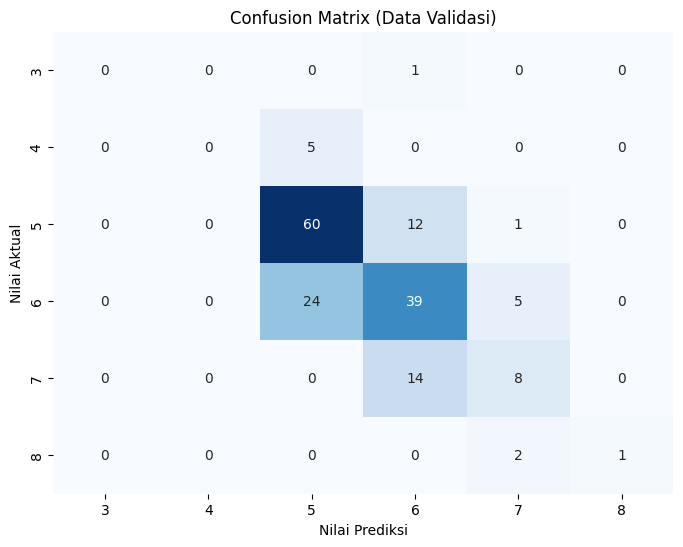

--------------------------------------------------
4. PREDIKSI DATA UJI DAN PENYIMPANAN...
✅ Prediksi Selesai. Hasil disimpan sebagai: hasilprediksi_3digitNIMterakhir.csv
5 Baris Pertama Hasil Prediksi:
     Id  Quality
0   222        5
1  1514        6
2   417        5
3   754        5
4   516        5
--------------------------------------------------


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ==============================================================================
# 1. PEMUATAN DATA & PERSIAPAN
# ==============================================================================
print("1. MEMUAT DATA DAN PERSIAPAN...")

# Muat data training dan testing
try:
    df_train = pd.read_csv('/content/data_training.csv')
    df_test = pd.read_csv('/content/data_testing.csv')
except FileNotFoundError:
    print("❌ ERROR: File CSV tidak ditemukan. Pastikan file telah diunggah dengan benar.")
    exit()

# Pisahkan Fitur (X) dan Target (y) dari Data Training
X = df_train.drop(columns=['quality', 'Id'])
y = df_train['quality']

# Pisahkan Id dari Data Testing untuk file submission
test_ids = df_test['Id']
X_test_data = df_test.drop(columns=['Id'])

print(f"Data Training (Sampel): {X.shape}")
print(f"Data Testing (Sampel): {X_test_data.shape}")
print("-" * 50)


# ==============================================================================
# 2. NORMALISASI DATA (FEATURE SCALING) - Standardisasi
# ==============================================================================
print("2. NORMALISASI DATA (STANDARDISASI)...")

# Inisialisasi StandardScaler
# StandardScaler menghasilkan mean=0 dan std=1
scaler = StandardScaler()

# Latih dan Transformasi pada Data Training
# Gunakan fit_transform() pada data pelatihan
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Transformasi pada Data Testing
# Gunakan transform() saja pada data testing (menggunakan parameter yang dipelajari dari data training)
X_test_scaled = scaler.transform(X_test_data)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_data.columns)

print("✅ Normalisasi selesai. Semua fitur kini memiliki mean=0 dan std=1.")
print("-" * 50)


# ==============================================================================
# 3. PEMODELAN DATA (RANDOM FOREST CLASSIFIER) & EVALUASI
# ==============================================================================
print("3. PEMODELAN DATA (RANDOM FOREST) & EVALUASI...")

# Bagi data yang sudah di-scale untuk pelatihan dan pengujian (simulasi)
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42, stratify=y
)

# Inisialisasi dan Latih Model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("✅ Pelatihan Model Random Forest Selesai.")

# EVALUASI PADA DATA VALIDASI (TEST SIMULASI)
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"\n===== HASIL EVALUASI DATA VALIDASI =====")
print(f"Akurasi Model: {val_accuracy:.4f}")

# Laporan Klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_val, y_val_pred, zero_division=0))

# Visualisasi Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=False,
    yticklabels=np.sort(y.unique()),
    xticklabels=np.sort(y.unique())
)
plt.xlabel('Nilai Prediksi')
plt.ylabel('Nilai Aktual')
plt.title('Confusion Matrix (Data Validasi)')
plt.show()

print("-" * 50)


# ==============================================================================
# 4. PREDIKSI DATA UJI & PENYIMPANAN
# ==============================================================================
print("4. PREDIKSI DATA UJI DAN PENYIMPANAN...")

# Lakukan Prediksi pada Data Testing Sesungguhnya
test_predictions = model.predict(X_test_scaled_df)

# Buat DataFrame Hasil Prediksi
df_submission = pd.DataFrame({
    'Id': test_ids,
    'Quality': test_predictions
})

# Simpan ke file CSV dengan delimiter semicolon (;)
output_filename = 'hasilprediksi_3digitNIMterakhir.csv'
df_submission.to_csv(output_filename, index=False, sep=';')

print(f"✅ Prediksi Selesai. Hasil disimpan sebagai: {output_filename}")
print(f"5 Baris Pertama Hasil Prediksi:\n{df_submission.head()}")
print("-" * 50)

Bagian ini menunjukkan seberapa baik kinerja model Random Forest pada Data Validasi (sebanyak 172 sampel), yang merupakan data yang tidak digunakan saat pelatihan model.

Akurasi Model: 0.6279 (sekitar 62.79%)

1. Ini adalah metrik utama yang menunjukkan persentase keseluruhan prediksi yang benar. Artinya, sekitar 63% dari total sampel data validasi diprediksi dengan benar oleh model.

Laporan klasifikasi tersebut memberikan metrik kinerja yang lebih rinci untuk setiap kelas (Quality 3 hingga 8).

1. Precision (Presisi): Seberapa akurat prediksi positif model. Contoh, dari semua sampel yang diprediksi sebagai Quality 5, 67% di antaranya benar-benar Quality 5.

2. Recall (Sensitivitas/Laju Benar Positif): Seberapa banyak sampel positif sebenarnya yang berhasil ditangkap oleh model. Contoh, dari semua sampel yang benar-benar Quality 5, 82% berhasil diprediksi dengan benar oleh model.

3. F1-Score: Rata-rata harmonik dari Precision dan Recall. Merupakan metrik keseimbangan.

4. Support: Jumlah sampel aktual untuk setiap kelas dalam data validasi.
Untuk Kelas 3, 4, dan 8 memiliki support yang sangat kecil (1, 5, dan 3), yang menyebabkan metrik mereka menjadi tidak stabil (misalnya Precision/Recall 0.00 atau Precision 1.00). Model tampak berfokus terutama pada kelas 5 (73 sampel) dan 6 (68 sampel).

Confusion Matrix (Data Validasi) menunjukkan rincian prediksi yang benar dan salah. Baris mewakili Nilai Aktual (nilai sebenarnya dari data), dan Kolom mewakili Nilai Prediksi (nilai yang diprediksi model). Angka pada diagonal (dari kiri atas ke kanan bawah) adalah jumlah prediksi yang Benar.

Contoh pembacaan (Kelas 5) :

1. Ada 60 sampel aktual Quality 5 yang diprediksi Benar sebagai Quality 5.

2. Ada 12 sampel aktual Quality 5 yang salah diprediksi sebagai Quality 6.

3. Ada 1 sampel aktual Quality 5 yang salah diprediksi sebagai Quality 7.

Contoh pembacaan (Kelas 6) :

1. Ada 39 sampel aktual Quality 6 yang diprediksi Benar sebagai Quality 6.

2. Ada 24 sampel aktual Quality 6 yang salah diprediksi sebagai Quality 5. (Ini menunjukkan kebingungan terbesar model, cenderung salah memprediksi Q6 menjadi Q5).

3. Ada 5 sampel aktual Quality 6 yang salah diprediksi sebagai Quality 7.

Jadi, Model Random Forest memiliki akurasi keseluruhan sekitar 63%. Kinerja model cukup baik dalam mengklasifikasikan Quality 5 dan 6, namun seringkali keliru membedakan antara kedua kelas tersebut (banyak Q6 yang diprediksi sebagai Q5). Kelas dengan sedikit sampel (3, 4, 7, 8) sulit diprediksi dengan akurat.